# Problem Statement
In this Jupyter Notebook, we will apply a K-Means Clustering algorithm on the output of a Classification and/or Regression algorithm. 
We will start with a small "proof-of-concept", where we apply K-Means clustering on the test data generated from a Wine dataset.
The purpose of this research is to investigate which errors occur disproportionately more in clusters comprising instances with demographic attributes, such as age, gender and income. This could indicate that the classification/regression algorithm underperforms for these groups, hereby indicating discriminating behaviour.

Furthermore, this study is inspired by the following paper: https://bit.ly/3g2pAmT (the Bias-Aware Hierarchical K-Means Clustering algorithm). 

### 1. Preprocessing the dataset
We start with creating the dataset through applying a classification or regression algorithm on the data to generate the desired input for the clustering analysis. 
Our input for the clustering algorithm has the following components:
- The test data in a Pandas DataFrame: the instances with their features 
- The ground truth labels (for a classification model) or values (for a regression model)
- The predicted classes/values per instance
- The errors of the model per instance, which can be calculated from (truth label - predicted label)

### Step 2: Applying the K-Means Clustering
The second step is to apply K-Means Clustering on this dataset to group similar errors into clusters. The cluster with the highest error rate will then be further investigated.

### Step 3. 

 



# 1. Preprocessing the dataset
 

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans

In [83]:
from sklearn.datasets import load_wine #later wil ik ook andere datasets proberen


data = load_wine()
df_data = pd.DataFrame(data.data, columns=data.feature_names)
df_target = pd.DataFrame(data = data.target)

# Dividing X and y into train and test data (small train data to gain more errors)
X_train, X_test, y_train, y_test = train_test_split(df_data, df_target, test_size=0.40, random_state=2)

# Training a RandomForest Classifier 
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Obtaining predictions
y_hat = model.predict(X_test)

# Converting y_hat from Np to DF
predictions_col = pd.DataFrame()
predictions_col['predictions'] = y_hats.tolist()
predictions_col['true classes'] = y_test
predictions_col['errors'] =  predictions_col['true classes'] - predictions_col['predictions'] 

# adding predictions to test data
df_out = pd.merge(X_test, predictions_col, left_index = True, right_index = True)
print(df_out)

     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
12     13.75        1.73  2.41               16.0       89.0           2.60   
23     12.85        1.60  2.52               17.8       95.0           2.48   
25     13.05        2.05  3.22               25.0      124.0           2.63   
35     13.48        1.81  2.41               20.5      100.0           2.70   
13     14.75        1.73  2.39               11.4       91.0           3.10   
65     12.37        1.21  2.56               18.1       98.0           2.42   
112    11.76        2.68  2.92               20.0      103.0           1.75   
48     14.10        2.02  2.40               18.8      103.0           2.75   
78     12.33        0.99  1.95               14.8      136.0           1.90   
3      14.37        1.95  2.50               16.8      113.0           3.85   
6      14.39        1.87  2.45               14.6       96.0           2.50   
122    12.42        4.43  2.73               26.5   

# Clustering 
Sources:

https://www.youtube.com/watch?v=ZueoXMgCd1c&list=PLQVvvaa0QuDfKTOs3Keq_kaG2P55YRn5v&index=35&ab_channel=sentdex


## K-Means Clustering
K is the hyperparameter that defines how many clusters there will be formed in the cluster space. When you take K=2, then the data will be grouped into two clusters. 
When we have k=2, we have two centroids. We calculate the distance between the datapoints and the centroids. We assign each datapoint to the centroid that is closest. 
The centroids are randomly chosen and we classify the datapoints as being part of either cluster 1 or cluster 2. 
Then, we calculate the mean of all datapoints in cluster 1 and cluster 2 and we define the new centroid. 
Once the centroids are not moving anymore, we have the final centroids.
We also have a tolerance and a max_iteration parameter. 

Downside K-means: 
* It clusters the data in groups of roughly the same size. So you can't have three clusters in different sizes.
* Scaling 

Clustering is mostly used to find a certain pattern in the data rather than accuracy or visualisation purposes. 


<AxesSubplot:xlabel='errors', ylabel='predictions'>

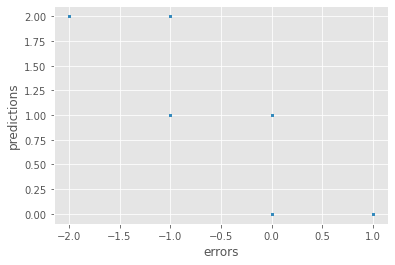

In [84]:
# Example of a clustering algorithm
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
from sklearn.cluster import KMeans

# Hoe kan ik plots maken als de column namen onbekend zijn bij de df_out dataframe?
df_out.plot.scatter(x='errors', y='predictions', s=5)


###
https://towardsdatascience.com/clustering-with-k-means-1e07a8bfb7ca



In [70]:
# Checking whether the SciKit KMeans is applicable on the PD Dataframe
# source: https://stackoverflow.com/questions/28017091/will-pandas-dataframe-object-work-with-sklearn-kmeans-clustering 

# Converting df to matrix 
df_matrix = df_out.values
print (df_matrix) # Hoe kan ik deze het beste interpreteren? Dit klopt volgens mij niet



[[ 1.375e+01  1.730e+00  2.410e+00  1.600e+01  8.900e+01  2.600e+00
   2.760e+00  2.900e-01  1.810e+00  5.600e+00  1.150e+00  2.900e+00
   1.320e+03  0.000e+00  0.000e+00  0.000e+00]
 [ 1.285e+01  1.600e+00  2.520e+00  1.780e+01  9.500e+01  2.480e+00
   2.370e+00  2.600e-01  1.460e+00  3.930e+00  1.090e+00  3.630e+00
   1.015e+03  1.000e+00  0.000e+00 -1.000e+00]
 [ 1.305e+01  2.050e+00  3.220e+00  2.500e+01  1.240e+02  2.630e+00
   2.680e+00  4.700e-01  1.920e+00  3.580e+00  1.130e+00  3.200e+00
   8.300e+02  0.000e+00  0.000e+00  0.000e+00]
 [ 1.348e+01  1.810e+00  2.410e+00  2.050e+01  1.000e+02  2.700e+00
   2.980e+00  2.600e-01  1.860e+00  5.100e+00  1.040e+00  3.470e+00
   9.200e+02  1.000e+00  0.000e+00 -1.000e+00]
 [ 1.475e+01  1.730e+00  2.390e+00  1.140e+01  9.100e+01  3.100e+00
   3.690e+00  4.300e-01  2.810e+00  5.400e+00  1.250e+00  2.730e+00
   1.150e+03  2.000e+00  0.000e+00 -2.000e+00]
 [ 1.237e+01  1.210e+00  2.560e+00  1.810e+01  9.800e+01  2.420e+00
   2.650e+00  3.7

In [ ]:
# Applying Sklearn
clf = KMeans(n_clusters=2)
clf.fit(df_matrix)
centroids = clf.cluster_centers_
labels = clf.labels_
print(labels)

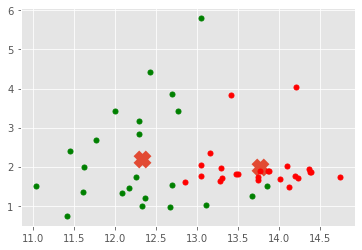

In [68]:
# defining the colors of the clusters
colors = ["g.", "r.", "c.", "b.", "k.", "o."]

for i in range(len(df_matrix)):
    plt.plot(df_matrix[i][0], df_matrix[i][1], colors[labels[i]], markersize=10)
plt.scatter(centroids[:, 0], centroids[:,1], marker='x', s=150, linewidths=8)
plt.show()

In [59]:
colors = ["g.", "r.", "c.", "b.", "k.", "o."]


for i in range(len(df_matrix)):
    plt.plot(df_matrix[i][0], df_matrix[i][1], colors[labels[i]], markersize=10)
plt.scatter(centroids[:, 0], centroids[:,1], marker='x', s=150, linewidths=8)
plt.show()

      0  1
0    12  0
1    23  0
2    25  0
3    35  0
4    13  0
5    65  1
6   112  1
7    48  0
8    78  1
9     3  0
10    6  0
11  122  1
12   42  0
13    2  0
14   29  0
15   45  0
16  106  1
17   94  1
18    5  0
19   53  0
20   93  1
21   41  0
22   54  0
23   24  0
24   64  1
25   28  0
26  113  1
27  120  1
28   89  1
29   92  1
30   79  1
31   14  0
32  119  1
33   44  0
34   66  1
35  123  1
36  109  1
37   85  1
38   99  1
39   57  0
40   71  1
41  118  1
42   11  0
43   36  0
44  115  1
45   62  1
46    0  0
47   27  0


In [ ]:
# Save cluster results in a Pandas DF
cluster_results = pd.DataFrame(data=labels, columns=['cluster'], index=collapsed.index)